# 날씨

In [63]:
import os
import pandas as pd

os.chdir('C:/Users/rameo/Desktop/ajou/ML_project') 
os.getcwd()

# 날씨 데이터 불러오기
weather_raw = pd.read_csv('OBS_ASOS_DD_20220602140342.csv', sep=',', encoding='CP949')

# 결측값 처리
weather_pre = weather_raw.fillna(method='pad') # 앞의 행 값으로 대체 
weather_pre.isnull().sum() # 1시간 최다강수량, 합계 3시간 신적설 제외 >> 앞의 값이 없음 

weather_pre

,지점,지점명,일시,평균기온(°C),1시간 최다강수량(mm),일강수량(mm),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%),평균 증기압(hPa),...,평균 해면기압(hPa),합계 일사량(MJ/m2),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),기사,안개 계속시간(hr)
0,119,수원,2020-01-01,-2.2,NaN,0.0,1.2,-5.3,79.3,4.2,...,1032.6,3.27,NaN,8.8,8.8,-1.5,0.4,0.5,{눈}0010-0140. {눈}0350-0445. {박무}1825-2010. {박무...,NaN
1,119,수원,2020-01-02,1.3,NaN,0.0,0.7,-1.2,83.3,5.6,...,1030.0,2.14,NaN,8.3,8.3,-0.2,0.4,0.5,{박무}0330-{박무}{강도0}0600-{박무}{강도0}0900-{박무}{강도0}...,NaN
2,119,수원,2020-01-03,-0.1,NaN,0.0,1.3,-3.3,80.5,4.8,...,1027.7,9.92,NaN,0.6,0.0,-0.4,0.9,1.3,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도0}090...,NaN
3,119,수원,2020-01-04,1.3,NaN,0.0,1.3,-2.8,76.1,5.0,...,1026.6,8.58,NaN,2.5,1.8,0.1,1.1,1.6,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도0}090...,NaN
4,119,수원,2020-01-05,0.1,NaN,0.0,0.9,-4.7,72.4,4.3,...,1030.9,9.22,NaN,4.6,0.0,-0.4,1.0,1.4,{박무}0450-{박무}{강도0}0600-{박무}{강도0}0900-1050. {연무...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,119,수원,2020-12-27,4.7,0.0,0.0,1.2,0.1,73.1,6.1,...,1022.0,7.37,0.6,7.3,4.0,1.5,1.0,1.4,{비}0235-0245. -{박무}-{박무}{강도0}0300-0435. {박무}05...,6.63
362,119,수원,2020-12-28,5.3,0.0,0.0,1.1,2.1,81.3,7.1,...,1023.5,8.62,0.6,4.4,1.8,3.8,1.0,1.5,{박무}0045-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도0}...,6.63
363,119,수원,2020-12-29,-0.3,0.0,0.2,2.5,-3.2,82.3,5.0,...,1022.1,2.35,0.6,8.8,6.8,0.7,0.7,1.0,-{안개}-{시정(미만)}{1km}{안개}0241-{시정(미만)}{0.5km}{안개...,7.28
364,119,수원,2020-12-30,-10.0,0.0,0.2,4.6,-17.1,56.8,1.6,...,1024.0,11.02,0.6,0.3,0.3,-3.8,0.9,1.2,-{안개}-{시정(미만)}{1km}{안개}0241-{시정(미만)}{0.5km}{안개...,7.28


C:\Users\rameo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rameo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


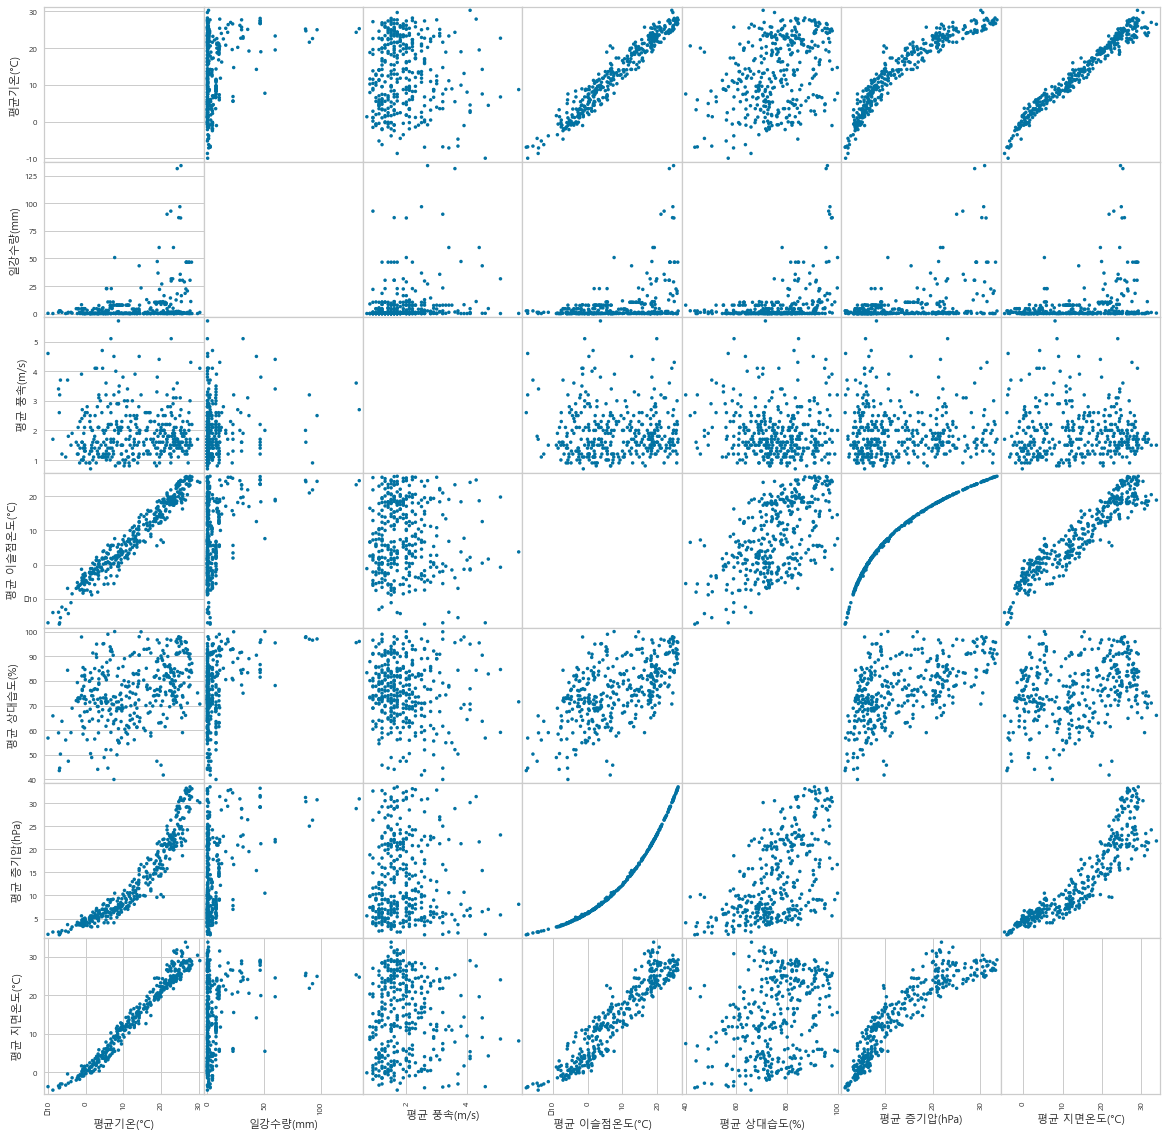

In [64]:
from pandas.plotting import scatter_matrix

plt.rc("font", family = "Malgun Gothic")

# 사용할 수O
use_col = ['평균기온(°C)','일강수량(mm)','평균 풍속(m/s)','평균 이슬점온도(°C)',
           '평균 상대습도(%)','평균 증기압(hPa)','평균 지면온도(°C)']

# 변수간 상관관계 알아보기 
scatter_matrix(weather_pre[use_col],
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(20,20), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

In [65]:
from sklearn.preprocessing import MinMaxScaler

# 기온과 풍속이 상관관계가 없다고 생각해 두개의 변수 선택
data = weather_pre[['평균기온(°C)','평균 풍속(m/s)']]

# 사용할 변수 스케일링
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
data_scale

array([[0.19354839, 0.1       ],
       [0.28039702, 0.        ],
       [0.24565757, 0.12      ],
       [0.28039702, 0.12      ],
       [0.25062035, 0.04      ],
       [0.33498759, 0.28      ],
       [0.43920596, 0.26      ],
       [0.32009926, 0.68      ],
       [0.24069479, 0.28      ],
       [0.23076923, 0.06      ],
       [0.24317618, 0.14      ],
       [0.23573201, 0.24      ],
       [0.19851117, 0.28      ],
       [0.19851117, 0.1       ],
       [0.18610422, 0.18      ],
       [0.19851117, 0.16      ],
       [0.22084367, 0.06      ],
       [0.23573201, 0.08      ],
       [0.29032258, 0.26      ],
       [0.27791563, 0.36      ],
       [0.23076923, 0.06      ],
       [0.30024814, 0.08      ],
       [0.34987593, 0.16      ],
       [0.30769231, 0.14      ],
       [0.31761787, 0.04      ],
       [0.37965261, 0.26      ],
       [0.39454094, 0.42      ],
       [0.43176179, 0.2       ],
       [0.40198511, 0.1       ],
       [0.37965261, 0.16      ],
       [0.

C:\Users\rameo\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=None)

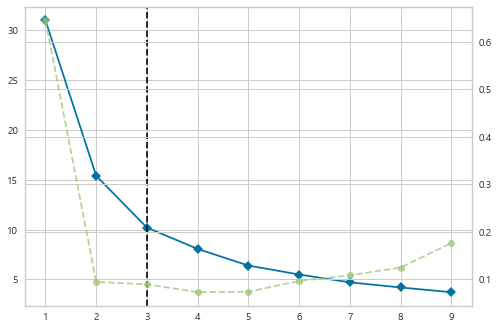

In [66]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# optimal k 선택
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)
# 파란색 : 각 데이터들의 군집 중심과의 평균 거리, 초록색 : 학습시간, 검정색 위치: k

In [67]:
from sklearn.cluster import KMeans

# 클러스터링
k = 3

model = KMeans(n_clusters=k, random_state=10)
model.fit(data_scale)

# 클러스터링 한 결과 저장
weather_pre['cluster'] = model.fit_predict(data_scale) 
weather_pre['cluster']

0      0
1      0
2      0
3      0
4      0
      ..
361    0
362    0
363    1
364    1
365    0
Name: cluster, Length: 366, dtype: int32

<AxesSubplot:xlabel='평균기온(°C)', ylabel='평균 풍속(m/s)'>

C:\Users\rameo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rameo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


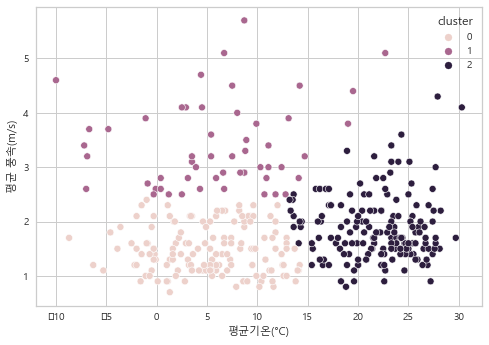

In [68]:
import seaborn as sns

plt.rc("font", family = "Malgun Gothic")

sns.scatterplot(data=weather_pre, x='평균기온(°C)', y='평균 풍속(m/s)',hue=weather_pre['cluster'])

# 0: 기온이 낮고 풍속도 낮음
# 1: 대체적으로 풍속이 높음
# 2 : 기온이 높고 풍속이 낮음

In [69]:
# 리스트 초기화
cluster_0 = []
cluster_1 = []
cluster_2 =[]

# 날짜 저장
cluster_0 = list(weather_pre[weather_pre['cluster'] == 0]['일시'])
cluster_1 = list(weather_pre[weather_pre['cluster'] == 1]['일시'])
cluster_2 = list(weather_pre[weather_pre['cluster'] == 2]['일시'])


# 사고 유형

In [70]:
accident_type_raw = pd.read_excel('accident type.xls')

accident_type = accident_type_raw.drop(accident_type_raw.index[366])

accident_type.isnull().sum()
# accident_type

사고월          0
사고일          0
횡단중          0
정면충돌         0
추돌           0
주/정차차량 충돌    0
도로이탈         0
전복           0
dtype: int64

In [71]:
date = []

for i in range(len(accident_type)):
    m = accident_type['사고월'][i].split('월')[0]
    d = accident_type['사고일'][i].split('일')[0]
    
    date.append('2020-' + m + '-' + d)

accident_type = accident_type.drop(['사고월','사고일'], axis='columns')
accident_type['일시'] = date
accident_type = accident_type[['일시', '횡단중','정면충돌','추돌','주/정차차량 충돌','도로이탈','전복']]
accident_type = accident_type.set_index('일시')
accident_type

,횡단중,정면충돌,추돌,주/정차차량 충돌,도로이탈,전복
일시,,,,,,
2020-01-01,29.0,11.0,60.0,-,3,1
2020-01-02,53.0,17.0,64.0,-,6,-
2020-01-03,39.0,27.0,97.0,-,2,-
2020-01-04,33.0,24.0,70.0,-,-,2
2020-01-05,27.0,13.0,62.0,-,4,-
...,...,...,...,...,...,...
2020-12-27,22.0,14.0,44.0,-,-,-
2020-12-28,44.0,24.0,83.0,-,1,-
2020-12-29,41.0,21.0,71.0,-,2,-


In [72]:
cluster0_df = pd.DataFrame()
cluster1_df = pd.DataFrame()
cluster2_df = pd.DataFrame()

# cluster0 교통사고 유형
for i in range(len(cluster_0)):
    ds = accident_type[accident_type.index == cluster_0[i]]
    cluster0_df = pd.concat([cluster0_df,ds])
# cluster0

# cluster1 교통사고 유형
for i in range(len(cluster_1)):
    ds = accident_type[accident_type.index == cluster_1[i]]
    cluster1_df = pd.concat([cluster1_df,ds])
# cluster1

# cluster2 교통사고 유형
for i in range(len(cluster_2)):
    ds = accident_type[accident_type.index == cluster_2[i]]
    cluster2_df = pd.concat([cluster2_df,ds])
# cluster2


print('-------------------------\n')
print('cluster0 : 기온이 낮고 풍속도 낮음\n')
print(cluster0_df.mean(),'\n')
print('-------------------------\n')
print('cluster1 : 대체적으로 풍속이 높음\n')
print(cluster1_df.mean(),'\n')
print('-------------------------\n')
print('cluster2 : 기온이 높고 풍속이 낮음\n')
print(cluster2_df.mean(),'\n')
print('-------------------------\n')

-------------------------

cluster0 : 기온이 낮고 풍속도 낮음

횡단중     36.979310
정면충돌    20.151724
추돌      87.765517
dtype: float64 

-------------------------

cluster1 : 대체적으로 풍속이 높음

횡단중     35.351852
정면충돌    20.185185
추돌      89.314815
dtype: float64 

-------------------------

cluster2 : 기온이 높고 풍속이 낮음

횡단중     35.185629
정면충돌    20.850299
추돌      92.479042
dtype: float64 

-------------------------

